In [498]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [499]:
import pandas as pd

data_path = '../titanic/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'PassengerId')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'PassengerId')
submission = pd.read_csv(data_path + 'gender_submission.csv' , index_col= 'PassengerId')

In [500]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [501]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [502]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [503]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [504]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
# all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## AGE 에 대해 NaN 값 처리

In [505]:
# all_data['Name'] = list(map(lambda x : x.split()[1][:-1] , all_data['Name']))
# all_data['Name'].unique()

In [506]:
all_data['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [507]:
# all_data['Name'] = all_data['Name'].apply(lambda x: x if x.split()[1][:-1] not in ['Mr', 'Miss', 'Mrs','Master'] else x.split()[1][:-1])
# all_data['Name'].unique()

In [508]:
all_data["Occupation"] = all_data["Name"].str.split(",|\\.").str[1].str.strip()

# 직업 정보를 출력합니다.
print(all_data["Occupation"])

PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306      Dona
1307        Mr
1308        Mr
1309    Master
Name: Occupation, Length: 1309, dtype: object


In [509]:
a= all_data['Occupation'].unique()
a

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [510]:
occupation_counts = all_data["Occupation"].value_counts()

a = pd.concat([occupation_counts] , axis = 1)
a = a.reset_index()
a
# 계산된 결과를 데이터프레임으로 변환합니다.
# occupation_counts_df = occupation_counts.to_frame(name="Count")
#
# # 결과를 출력합니다.
# occupation_counts_df

,index,Occupation
0,Mr,757
1,Miss,260
2,Mrs,197
3,Master,61
4,Rev,8
5,Dr,8
6,Col,4
7,Ms,2
8,Major,2
9,Mlle,2


In [511]:
# t = a.values.tolist()
t = a["index"].to_numpy().tolist()[:6]
t

['Mr', 'Miss', 'Mrs', 'Master', 'Rev', 'Dr']

In [512]:
for i in t:

    print(all_data[all_data["Name"].str.contains(i)])

             Survived  Pclass  \
PassengerId                     
1                 0.0       3   
2                 1.0       1   
4                 1.0       1   
5                 0.0       3   
6                 0.0       3   
...               ...     ...   
1299              NaN       1   
1303              NaN       1   
1305              NaN       3   
1307              NaN       3   
1308              NaN       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
...       

In [513]:
all_data['Name'] =all_data['Occupation']

In [514]:
all_data['Name'] = all_data['Name'].apply(lambda x: 'baby' if x not in t else x)
all_data


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,,
1,0.0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1.0,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1.0,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1.0,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0.0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1306,NaN,1,baby,female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1307,NaN,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr


## Cabin 전처리 해보기

In [515]:
# all_data.drop(all_data[['Ticket' , 'Cabin']] , axis = 1 , inplace=True)
#
# all_data

In [516]:
all_data['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
D                  4
F33                4
                  ..
E38                1
A9                 1
D9                 1
F E69              1
B102               1
Name: Cabin, Length: 186, dtype: int64

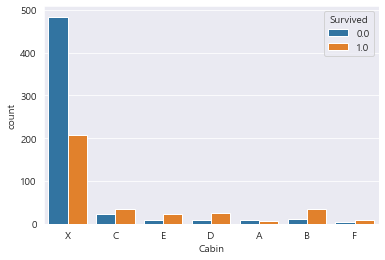

In [517]:
all_data['Cabin'] = all_data['Cabin'].fillna('X')

all_data['Cabin'] = all_data['Cabin'].apply(lambda x: x[0])

all_data['Cabin'] = all_data['Cabin'].replace({'G':'X', 'T':'X'})

ax = sns.countplot(x='Cabin',  hue = 'Survived' , data = all_data)
plt.show()

In [518]:
from sklearn.preprocessing import LabelEncoder

# 명목형 변수 데이터
a= all_data['Cabin']
# LabelEncoder 인스턴스 생성
encoder = LabelEncoder()

# 데이터를 변환하여 숫자로 인코딩
encoded_labels = encoder.fit_transform(a)

all_data['Cabin'] = encoded_labels
all_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,,
1,0.0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,6,S,Mr
2,1.0,1,Mrs,female,38.0,1,0,PC 17599,71.2833,2,C,Mrs
3,1.0,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,6,S,Miss
4,1.0,1,Mrs,female,35.0,1,0,113803,53.1000,2,S,Mrs
5,0.0,3,Mr,male,35.0,0,0,373450,8.0500,6,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,6,S,Mr
1306,NaN,1,baby,female,39.0,0,0,PC 17758,108.9000,2,C,Dona
1307,NaN,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,6,S,Mr


In [519]:
all_data[['Cabin' , 'Survived']]

,Cabin,Survived
PassengerId,,
1,6,0.0
2,2,1.0
3,6,1.0
4,2,1.0
5,6,0.0
...,...,...
1305,6,NaN
1306,2,NaN
1307,6,NaN


In [520]:
all_data[['Cabin' , 'Survived']].corr()

,Cabin,Survived
Cabin,1.000000,-0.283307
Survived,-0.283307,1.000000


In [521]:
all_data['Cabin'] = all_data['Cabin'].astype('int64')
all_data['Cabin'].dtype

dtype('int64')

In [522]:
all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거

all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,
1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,6,S,Mr
2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,2,C,Mrs
3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,6,S,Miss
4,1,Mrs,female,35.0,1,0,113803,53.1000,2,S,Mrs
5,3,Mr,male,35.0,0,0,373450,8.0500,6,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,6,S,Mr
1306,1,baby,female,39.0,0,0,PC 17758,108.9000,2,C,Dona
1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,6,S,Mr


## Fare , Embarked 전처리 하기

In [523]:
all_data[all_data['Fare'] == 0]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Occupation
PassengerId,,,,,,,,,,,
180,3,Mr,male,36.0,0,0,LINE,0.0,6,S,Mr
264,1,Mr,male,40.0,0,0,112059,0.0,1,S,Mr
272,3,Mr,male,25.0,0,0,LINE,0.0,6,S,Mr
278,2,Mr,male,NaN,0,0,239853,0.0,6,S,Mr
303,3,Mr,male,19.0,0,0,LINE,0.0,6,S,Mr
414,2,Mr,male,NaN,0,0,239853,0.0,6,S,Mr
467,2,Mr,male,NaN,0,0,239853,0.0,6,S,Mr
482,2,Mr,male,NaN,0,0,239854,0.0,6,S,Mr
598,3,Mr,male,49.0,0,0,LINE,0.0,6,S,Mr


In [524]:
all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode().iloc[0])

fare_medians = all_data[all_data['Fare'] != 0].groupby('Pclass')['Fare'].median()
# fare_medians
# Fare 값이 0인 데이터를 PClass 등급에 따라 중앙값으로 채우기
for i, row in all_data.iterrows():
    if row['Fare'] == 0 or row['Fare'] == 'NaN':
        all_data.at[i, 'Fare'] = fare_medians[row['Pclass']]
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].mode().iloc[0])
# 결과 확인
all_data.loc[816:824]
all_data.drop('Occupation', axis=1, inplace=True)

all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,6,S
2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,2,C
3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,6,S
4,1,Mrs,female,35.0,1,0,113803,53.1000,2,S
5,3,Mr,male,35.0,0,0,373450,8.0500,6,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,6,S
1306,1,baby,female,39.0,0,0,PC 17758,108.9000,2,C
1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,6,S


In [525]:
all_data[all_data['Fare'] == 0]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [526]:
all_data.drop(all_data[['Ticket']] , axis = 1 , inplace=True)

all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,Mr,male,22.0,1,0,7.2500,6,S
2,1,Mrs,female,38.0,1,0,71.2833,2,C
3,3,Miss,female,26.0,0,0,7.9250,6,S
4,1,Mrs,female,35.0,1,0,53.1000,2,S
5,3,Mr,male,35.0,0,0,8.0500,6,S
...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,8.0500,6,S
1306,1,baby,female,39.0,0,0,108.9000,2,C
1307,3,Mr,male,38.5,0,0,7.2500,6,S


In [527]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Cabin     1309 non-null   int64  
 8   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 134.6+ KB


In [528]:
binary_col = []
object_col = []

for i in all_data.columns.tolist():
    if all_data[i].dtype in ['int64' , 'float64']:
        binary_col.append(i)
    else:
        object_col.append(i)

In [529]:
all_data[object_col]

,Name,Sex,Embarked
PassengerId,,,
1,Mr,male,S
2,Mrs,female,C
3,Miss,female,S
4,Mrs,female,S
5,Mr,male,S
...,...,...,...
1305,Mr,male,S
1306,baby,female,C
1307,Mr,male,S


In [530]:
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성
le = LabelEncoder()
for i in range(len(object_col)):
    all_data_label_encoded = le.fit_transform(all_data[object_col[i]])
    all_data[object_col[i]] = all_data_label_encoded
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,3,1,22.0,1,0,7.2500,6,2
2,1,4,0,38.0,1,0,71.2833,2,0
3,3,2,0,26.0,0,0,7.9250,6,2
4,1,4,0,35.0,1,0,53.1000,2,2
5,3,3,1,35.0,0,0,8.0500,6,2
...,...,...,...,...,...,...,...,...,...
1305,3,3,1,NaN,0,0,8.0500,6,2
1306,1,6,0,39.0,0,0,108.9000,2,0
1307,3,3,1,38.5,0,0,7.2500,6,2


In [531]:
all_data.iloc[:len(train)]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,3,1,22.0,1,0,7.2500,6,2
2,1,4,0,38.0,1,0,71.2833,2,0
3,3,2,0,26.0,0,0,7.9250,6,2
4,1,4,0,35.0,1,0,53.1000,2,2
5,3,3,1,35.0,0,0,8.0500,6,2
...,...,...,...,...,...,...,...,...,...
887,2,5,1,27.0,0,0,13.0000,6,2
888,1,2,0,19.0,0,0,30.0000,1,2
889,3,2,0,NaN,1,2,23.4500,6,2


In [532]:
all_data[pd.isnull(all_data['Age'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
6,3,3,1,NaN,0,0,8.4583,6,1
18,2,3,1,NaN,0,0,13.0000,6,2
20,3,4,0,NaN,0,0,7.2250,6,0
27,3,3,1,NaN,0,0,7.2250,6,0
29,3,2,0,NaN,0,0,7.8792,6,1
...,...,...,...,...,...,...,...,...,...
1300,3,2,0,NaN,0,0,7.7208,6,1
1302,3,2,0,NaN,0,0,7.7500,6,1
1305,3,3,1,NaN,0,0,8.0500,6,2


In [533]:

num_train = len(train) # 훈련데이터 개수
print(num_train)

X_train = all_data[~pd.isnull(all_data['Age'])]
X_test = all_data[pd.isnull(all_data['Age'])]


X_train = X_train.drop(['Age'] , axis =1)
X_test = X_test.drop(['Age'] , axis =1)
train2 = all_data[~pd.isnull(all_data['Age'])]
y = train2['Age']
y

891


PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
        ... 
1301     3.0
1303    37.0
1304    28.0
1306    39.0
1307    38.5
Name: Age, Length: 1046, dtype: float64

In [534]:
X_train

,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,3,1,1,0,7.2500,6,2
2,1,4,0,1,0,71.2833,2,0
3,3,2,0,0,0,7.9250,6,2
4,1,4,0,1,0,53.1000,2,2
5,3,3,1,0,0,8.0500,6,2
...,...,...,...,...,...,...,...,...
1301,3,2,0,1,1,13.7750,6,2
1303,1,4,0,1,0,90.0000,2,1
1304,3,2,0,0,0,7.7750,6,2


In [535]:
y

PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
        ... 
1301     3.0
1303    37.0
1304    28.0
1306    39.0
1307    38.5
Name: Age, Length: 1046, dtype: float64

In [536]:
X_train[X_train['Fare'].isnull()==True]

,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,


In [537]:
X_train[X_train['Embarked'].isnull()==True]

,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,


In [538]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train , y) # 모델 훈련

LinearRegression()

In [539]:
preds = linear_reg_model.predict(X_test)
preds.tolist()
preds

array([27.718, 33.948, 29.628, 26.877, 18.689, 28.543, 41.228, 18.688,
       26.877, 26.883, 28.545, 25.635, 18.688, 22.714, 40.923, 37.779,
       12.254, 28.543, 28.545, 18.689, 28.545, 28.545, 28.543, 28.542,
       16.69 , 28.545, 27.712, 15.423, 28.154, 28.538, 28.55 , -1.397,
       42.371, 39.423,  9.712,  1.354, 32.306, 41.761, 28.386, 27.712,
       18.688, 10.378, 25.565, 28.543, 12.464, 19.517, 15.772, 16.611,
       28.538, 40.998, 27.712, 18.688, 39.469, 18.688, 33.966, 41.544,
       37.779, 40.878, 18.688, 23.558, 24.795, 28.545, 29.51 , 10.378,
       14.535, 41.005, 28.543, 29.222, 40.919, 26.877, 18.689, 18.689,
       25.635, 29.628, 18.688, 38.877, 28.543, 27.712, 12.464, 28.543,
       27.704, 33.966, 31.296, 26.883, 28.538, 27.712, 29.222, 28.545,
       26.506, 28.545, 41.323, 27.712, 28.545, 33.966, 27.712, 28.538,
       41.779, 33.966, 12.464, 26.506, 26.943, 28.609, 18.687, 39.429,
       28.545, 27.861, 26.877, 26.877, 42.613, 26.877, 28.218, 28.603,
      

In [540]:
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,3,1,22.0,1,0,7.2500,6,2
2,1,4,0,38.0,1,0,71.2833,2,0
3,3,2,0,26.0,0,0,7.9250,6,2
4,1,4,0,35.0,1,0,53.1000,2,2
5,3,3,1,35.0,0,0,8.0500,6,2
...,...,...,...,...,...,...,...,...,...
1305,3,3,1,NaN,0,0,8.0500,6,2
1306,1,6,0,39.0,0,0,108.9000,2,0
1307,3,3,1,38.5,0,0,7.2500,6,2


In [541]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   int32  
 2   Sex       1309 non-null   int32  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Cabin     1309 non-null   int64  
 8   Embarked  1309 non-null   int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 119.2 KB


In [542]:
nan_idx = all_data['Age'].isnull()
all_data.loc[nan_idx, 'Age'] = preds

In [543]:
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,3,1,22.000000,1,0,7.2500,6,2
2,1,4,0,38.000000,1,0,71.2833,2,0
3,3,2,0,26.000000,0,0,7.9250,6,2
4,1,4,0,35.000000,1,0,53.1000,2,2
5,3,3,1,35.000000,0,0,8.0500,6,2
...,...,...,...,...,...,...,...,...,...
1305,3,3,1,28.544798,0,0,8.0500,6,2
1306,1,6,0,39.000000,0,0,108.9000,2,0
1307,3,3,1,38.500000,0,0,7.2500,6,2


## 위에꺼 까지가 연령에 대한 전처리 ==> 회귀 분석 사용

In [544]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   int32  
 2   Sex       1309 non-null   int32  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Cabin     1309 non-null   int64  
 8   Embarked  1309 non-null   int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 119.2 KB


In [545]:
all_data[binary_col]

,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,
1,3,22.000000,1,0,7.2500,6
2,1,38.000000,1,0,71.2833,2
3,3,26.000000,0,0,7.9250,6
4,1,35.000000,1,0,53.1000,2
5,3,35.000000,0,0,8.0500,6
...,...,...,...,...,...,...
1305,3,28.544798,0,0,8.0500,6
1306,1,39.000000,0,0,108.9000,2
1307,3,38.500000,0,0,7.2500,6


In [546]:
all_data[binary_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1309 non-null   int64  
 1   Age     1309 non-null   float64
 2   SibSp   1309 non-null   int64  
 3   Parch   1309 non-null   int64  
 4   Fare    1309 non-null   float64
 5   Cabin   1309 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 103.9 KB


In [547]:
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,3,1,22.000000,1,0,7.2500,6,2
2,1,4,0,38.000000,1,0,71.2833,2,0
3,3,2,0,26.000000,0,0,7.9250,6,2
4,1,4,0,35.000000,1,0,53.1000,2,2
5,3,3,1,35.000000,0,0,8.0500,6,2
...,...,...,...,...,...,...,...,...,...
1305,3,3,1,28.544798,0,0,8.0500,6,2
1306,1,6,0,39.000000,0,0,108.9000,2,0
1307,3,3,1,38.500000,0,0,7.2500,6,2


## 성능 개선 없이 그냥 베이스라인 모델 돌려보기

In [548]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성

all_data_encoded = encoder.fit_transform(all_data)

all_data_encoded

<1309x557 sparse matrix of type '<class 'numpy.float64'>'
	with 11781 stored elements in Compressed Sparse Row format>

### 데이터 나누기

In [549]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train = all_data_encoded[:num_train] # 0~num_train -1 행
X_test = all_data_encoded[num_train:] # num_train ~ 마지막 행

y = train['Survived']

In [550]:
from sklearn.model_selection import train_test_split

# 훈련 데이터 , 검증 데이터 분리

X_train , X_valid , y_train , y_valid = train_test_split(X_train , y , test_size=0.1 , stratify=y,random_state=10)

# test_size 는 검증 데이터 크기를 지정하는 파라미터이다.
# 값이 정수면 검증 데이터의 개수를 , 실수면 비율을 의미한다. 여기서는 0.1을 전달했으므로 10%를 검증 데이터로 분리하겠다는 의미이다.

# stratify 파라미터를 지정하지 않으면 훈련 데이터와 검증 데이터에 타깃값이 불균형하게 분포 될 수 있다.

### 모델 훈련

In [551]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 1000 , random_state=42)
logistic_model.fit(X_train,y_train) # 모델 훈련

LogisticRegression(max_iter=1000, random_state=42)

# 모델 성능 검증

- predict()는 타깃값 자체를 예측한다.

- predict_proba()는 타깃값의 확률(0일 확률과 1일 확률)을 예측한다.

In [552]:
logistic_model.predict_proba(X_valid)

array([[0.854, 0.146],
       [0.592, 0.408],
       [0.734, 0.266],
       [0.862, 0.138],
       [0.921, 0.079],
       [0.905, 0.095],
       [0.286, 0.714],
       [0.151, 0.849],
       [0.953, 0.047],
       [0.571, 0.429],
       [0.769, 0.231],
       [0.946, 0.054],
       [0.084, 0.916],
       [0.977, 0.023],
       [0.969, 0.031],
       [0.675, 0.325],
       [0.855, 0.145],
       [0.312, 0.688],
       [0.199, 0.801],
       [0.964, 0.036],
       [0.933, 0.067],
       [0.021, 0.979],
       [0.01 , 0.99 ],
       [0.889, 0.111],
       [0.561, 0.439],
       [0.733, 0.267],
       [0.77 , 0.23 ],
       [0.849, 0.151],
       [0.237, 0.763],
       [0.146, 0.854],
       [0.709, 0.291],
       [0.043, 0.957],
       [0.953, 0.047],
       [0.945, 0.055],
       [0.053, 0.947],
       [0.728, 0.272],
       [0.892, 0.108],
       [0.811, 0.189],
       [0.791, 0.209],
       [0.787, 0.213],
       [0.912, 0.088],
       [0.263, 0.737],
       [0.556, 0.444],
       [0.8

In [553]:
logistic_model.predict(X_valid)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [554]:
# 검증 데이터를 활용한 타깃 예측

y_valid_preds = logistic_model.predict_proba(X_valid)[:,1]

In [555]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC

roc_auc = roc_auc_score(y_valid , y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.8945


In [556]:
# 타깃값 1일 확룰 예측

y_preds= logistic_model.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [557]:
# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv('submission_1.csv')

## 성능 개선 -> 피처 엔지니어링

In [558]:
# all_data_bin = all_data[binary_col].fillna(all_data[binary_col].mode().iloc[0]) # NaN 값 제일 많은값으로 대체
#
# all_data_bin

In [559]:
object_col

['Name', 'Sex', 'Embarked']

In [560]:
# object_col = ['Name' , 'Sex' , 'Ticket' , 'Embarked']
all_data_obj = all_data[object_col]
# all_data_obj = all_data[object_col].fillna(all_data[object_col].mode().iloc[0])
all_data_obj[object_col].info()
# NaN 값 제일 많은값으로 대체인데, train[object_col]에는 NaN값 특히 Cabin에 있다. ==> Cabin값은 빼는게 낫지 않을까?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Name      1309 non-null   int32
 1   Sex       1309 non-null   int32
 2   Embarked  1309 non-null   int32
dtypes: int32(3)
memory usage: 57.9 KB


In [561]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 타깃값 분포

In [562]:
def write_percent(ax , total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율


        # (x, y) 좌표에 텍스트 입력
        ax.text(x= left_coord + width/2.0 ,   # x축 위치
                y = height + total_size*0.001, #y축 위치
                s = f'{percent : 1.1f}%', # 입력 텍스트
                ha = 'center') #가운데 정렬



# plt.figure(figsize=(7,6))
# train_bin['Survival'] = train['Survived'].map({0: '사망', 1: '생존'})
# ax = sns.countplot(x='Survival' , data = train_bin)
# write_percent(ax , len(train)) # 비율 표시
# ax.set_title('타이타닉 호 생존자')

In [563]:
binary_col

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']

## 연속형 피처 분포

In [564]:
all_data_bin = all_data[binary_col]

all_data_bin

,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,
1,3,22.000000,1,0,7.2500,6
2,1,38.000000,1,0,71.2833,2
3,3,26.000000,0,0,7.9250,6
4,1,35.000000,1,0,53.1000,2
5,3,35.000000,0,0,8.0500,6
...,...,...,...,...,...,...
1305,3,28.544798,0,0,8.0500,6
1306,1,39.000000,0,0,108.9000,2
1307,3,38.500000,0,0,7.2500,6


## 명목형 자료에 대해 계급간격 공식을 이용하여 범주화 시키기

- https://knowallworld.tistory.com/197

In [565]:
K = 60 # 계급간격
AGG = 10 # Age 간격

[530 216 191  81  29  41  43  24  34  23  13   0  13   4   0  13   3   9
   0   4   0   0   0   0   9   4   5   0   3   0  13   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]
[  3.171  11.657  20.143  28.629  37.115  45.601  54.087  62.573  71.059
  79.545  88.031  96.517 105.002 113.488 121.974 130.46  138.946 147.432
 155.918 164.404 172.89  181.376 189.862 198.348 206.834 215.32  223.806
 232.292 240.778 249.264 257.75  266.236 274.722 283.208 291.694 300.18
 308.666 317.152 325.638 334.124 342.61  351.096 359.582 368.068 376.554
 385.04  393.526 402.012 410.498 418.983 427.469 435.955 444.441 452.927
 461.413 469.899 478.385 486.871 495.357 503.843]


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

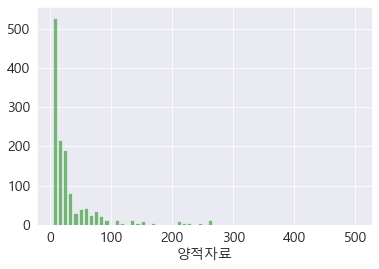

In [566]:
width = (max(all_data_bin['Fare']) - min(all_data_bin['Fare'])) / K #계급 간격 구하는 공식
bins = np.arange(min(all_data_bin['Fare']), max(all_data_bin['Fare']), width)


hist, bins = np.histogram(all_data_bin['Fare'], bins)
print(hist)
print(bins)

plt.hist(all_data_bin['Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [567]:
# PClass 등급별 Fare 중앙값(median) 계산
fare_medians = all_data_bin[all_data_bin['Fare'] != 0].groupby('Pclass')['Fare'].median()
# fare_medians
# Fare 값이 0인 데이터를 PClass 등급에 따라 중앙값으로 채우기
for i, row in all_data_bin.iterrows():
    if row['Fare'] == 0:
        all_data_bin.at[i, 'Fare'] = fare_medians[row['Pclass']]

# 결과 확인
all_data_bin.loc[816:824]

,Pclass,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,
816,1,41.511291,0,0,61.3792,1
817,3,23.000000,0,0,7.9250,6
818,2,31.000000,1,1,37.0042,6
819,3,43.000000,0,0,6.4500,6
820,3,10.000000,3,2,27.9000,6
821,1,52.000000,1,1,93.5000,1
822,3,27.000000,0,0,8.6625,6
823,1,38.000000,0,0,61.3792,6
824,3,27.000000,0,1,12.4750,4


In [568]:
all_data_bin['log_Fare'] = np.log(all_data_bin['Fare'])
min_log_fare = min(all_data_bin['log_Fare'])
min_log_fare_row = all_data_bin[all_data_bin['log_Fare'] == min_log_fare]
print(min_log_fare_row)
# 제일 log_Fare 값이 작은 열 출력




             Pclass  Age  SibSp  Parch    Fare  Cabin  log_Fare
PassengerId                                                    
913               3  9.0      0      1  3.1708      6  1.153984


<ipython-input-568-17cb4e2c0935>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_bin['log_Fare'] = np.log(all_data_bin['Fare'])


width : 0.08474972441987998
6.238967387173662
1.1539839219808636
hist : [  1   0   1   0   0   1   0   1   9  89 307  36  26   9  44  12  73  51
  45  20  13  14  32  31  71  52  34  28  18  21   7  11  13  34  25  11
  17  32  20  16   0  10   7   0  13  12   4   0   0   9   9   3  13   0
   0   0   0   0   0]
bins : [1.154 1.239 1.323 1.408 1.493 1.578 1.662 1.747 1.832 1.917 2.001 2.086
 2.171 2.256 2.34  2.425 2.51  2.595 2.679 2.764 2.849 2.934 3.018 3.103
 3.188 3.273 3.357 3.442 3.527 3.612 3.696 3.781 3.866 3.951 4.035 4.12
 4.205 4.29  4.374 4.459 4.544 4.629 4.713 4.798 4.883 4.968 5.052 5.137
 5.222 5.307 5.391 5.476 5.561 5.646 5.73  5.815 5.9   5.985 6.069 6.154]


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

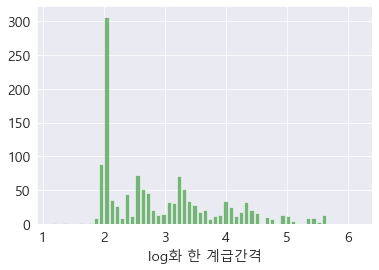

In [569]:
width = (max(all_data_bin['log_Fare']) - min(all_data_bin['log_Fare'])) / K #계급 간격 구하는 공식
print(f'width : {width}')
print(max(all_data_bin['log_Fare']))
print(min(all_data_bin['log_Fare']))
bins = np.arange(min(all_data_bin['log_Fare']), max(all_data_bin['log_Fare']), width)
hist, bins = np.histogram(all_data_bin['log_Fare'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(all_data_bin['log_Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('log화 한 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [570]:
# 범주의 크기를 지정할 width 변수 설정

bins = np.arange(min(all_data_bin['log_Fare']), max(all_data_bin['log_Fare']), width)
print(bins)
hist, bins = np.histogram(all_data_bin['log_Fare'], bins)
width = len(bins)

# 범주의 최솟값(min)과 최댓값(max)을 계산
min_val = all_data_bin['log_Fare'].min()
max_val = all_data_bin['log_Fare'].max()

# 최솟값과 최댓값을 width 간격으로 나눠서 labels 배열 생성
labels = [f'{round(i,1)}' for i in bins]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
all_data_bin['Fare_binned'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered = False)
# train 데이터프레임 내용 확인
all_data_bin


[1.154 1.239 1.323 1.408 1.493 1.578 1.662 1.747 1.832 1.917 2.001 2.086
 2.171 2.256 2.34  2.425 2.51  2.595 2.679 2.764 2.849 2.934 3.018 3.103
 3.188 3.273 3.357 3.442 3.527 3.612 3.696 3.781 3.866 3.951 4.035 4.12
 4.205 4.29  4.374 4.459 4.544 4.629 4.713 4.798 4.883 4.968 5.052 5.137
 5.222 5.307 5.391 5.476 5.561 5.646 5.73  5.815 5.9   5.985 6.069 6.154]


<ipython-input-570-0b5141b36130>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_bin['Fare_binned'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered = False)


,Pclass,Age,SibSp,Parch,Fare,Cabin,log_Fare,Fare_binned
PassengerId,,,,,,,,
1,3,22.000000,1,0,7.2500,6,1.981001,1.9
2,1,38.000000,1,0,71.2833,2,4.266662,4.2
3,3,26.000000,0,0,7.9250,6,2.070022,2.0
4,1,35.000000,1,0,53.1000,2,3.972177,4.0
5,3,35.000000,0,0,8.0500,6,2.085672,2.0
...,...,...,...,...,...,...,...,...
1305,3,28.544798,0,0,8.0500,6,2.085672,2.0
1306,1,39.000000,0,0,108.9000,2,4.690430,4.6
1307,3,38.500000,0,0,7.2500,6,1.981001,1.9


In [571]:
labels = [f"{bins[i]:.1f}~{bins[i+1]:.1f}" for i in range(len(bins)-1)]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
all_data_bin['Fare_binned_범위'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels , ordered=False)
# train 데이터프레임 내용 확인
all_data_bin

,Pclass,Age,SibSp,Parch,Fare,Cabin,log_Fare,Fare_binned,Fare_binned_범위
PassengerId,,,,,,,,,
1,3,22.000000,1,0,7.2500,6,1.981001,1.9,1.9~2.0
2,1,38.000000,1,0,71.2833,2,4.266662,4.2,4.2~4.3
3,3,26.000000,0,0,7.9250,6,2.070022,2.0,2.0~2.1
4,1,35.000000,1,0,53.1000,2,3.972177,4.0,3.9~4.0
5,3,35.000000,0,0,8.0500,6,2.085672,2.0,2.0~2.1
...,...,...,...,...,...,...,...,...,...
1305,3,28.544798,0,0,8.0500,6,2.085672,2.0,2.0~2.1
1306,1,39.000000,0,0,108.9000,2,4.690430,4.6,4.6~4.7
1307,3,38.500000,0,0,7.2500,6,1.981001,1.9,1.9~2.0


In [572]:
print(all_data_bin['Fare_binned'].unique())

print(all_data_bin['Fare_binned_범위'].unique())

['1.9', '4.2', '2.0', '4.0', '2.1', ..., '5.3', '1.3', '5.4', '1.6', '1.2']
Length: 42
Categories (42, object): ['1.9', '4.2', '2.0', '4.0', ..., '1.3', '5.4', '1.6', '1.2']
['1.9~2.0', '4.2~4.3', '2.0~2.1', '3.9~4.0', '2.1~2.2', ..., '4.5~4.5', '4.5~4.6', '3.7~3.8', '1.6~1.7', '1.2~1.2']
Length: 47
Categories (47, object): ['1.9~2.0', '4.2~4.3', '2.0~2.1', '3.9~4.0', ..., '4.5~4.6', '3.7~3.8', '1.6~1.7', '1.2~1.2']


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

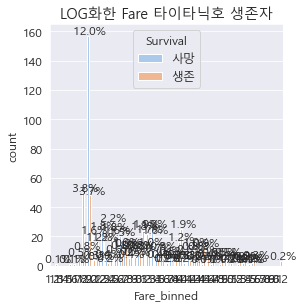

In [573]:
from matplotlib import gridspec

mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(10,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정
all_data_bin['Survival'] = train['Survived'].map({0: '사망', 1: '생존'})
# 서브플롯 그리기# 피처 목록

for idx, feature in enumerate(['Fare_binned']) :

    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data = all_data_bin , hue = 'Survival' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'LOG화한 Fare 타이타닉호 생존자') # 그래프 제목 설정
    write_percent(ax, len(all_data_bin))



In [574]:
bins_exp = np.exp(bins)
bins_exp

array([  3.171,   3.451,   3.756,   4.089,   4.45 ,   4.844,   5.272,
         5.739,   6.246,   6.799,   7.4  ,   8.054,   8.767,   9.542,
        10.386,  11.305,  12.305,  13.393,  14.577,  15.867,  17.27 ,
        18.798,  20.46 ,  22.27 ,  24.239,  26.383,  28.717,  31.256,
        34.021,  37.03 ,  40.305,  43.87 ,  47.75 ,  51.973,  56.57 ,
        61.573,  67.019,  72.946,  79.398,  86.42 ,  94.064, 102.383,
       111.438, 121.295, 132.022, 143.699, 156.409, 170.242, 185.299,
       201.688, 219.526, 238.942, 260.075, 283.077, 308.114, 335.365,
       365.026, 397.311, 432.451, 470.698])

### 'AGE' 계급간격 구하기

In [575]:
all_data_bin['Age'].describe()

count    1309.000000
mean       29.314341
std        13.441258
min        -1.397326
25%        21.000000
50%        28.000000
75%        36.771917
max        80.000000
Name: Age, dtype: float64

[1266]
[-1.397 58.603]


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

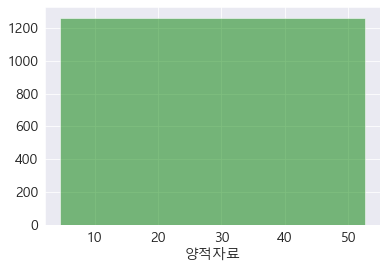

In [576]:
bins = np.arange(min(all_data_bin['Age']), max(all_data_bin['Age']), width)


hist, bins = np.histogram(all_data_bin['Age'], bins)
print(hist)
print(bins)

plt.hist(all_data_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)



### 분포가 생각보다 일정해서 log 화 안해도 될거 같다.
---

### 대신 간격의 수를 줄여야 겠다. 10대 20대 30대 이런식으로 하는것이 좋을 거 같다.

- describe()에서 최대값이 80살 , 최소값이 0살이므로 10개의 계급간격을 나누면 좋을거 같다.

width : 8.139732551368166
80.0
-1.3973255136816718
hist : [ 87 196 493 265 157  70  32   8]
bins : [ 0 10 20 30 40 50 60 70 80]


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

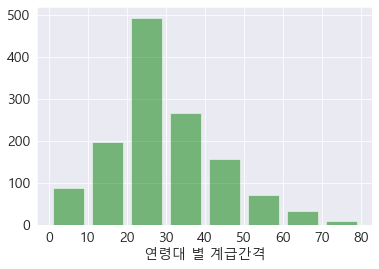

In [577]:
width = (max(all_data_bin['Age']) - min(all_data_bin['Age'])) / 10 #계급 간격 구하는 공식

# width = np.arange(0,90,10)

print(f'width : {width}')
print(max(all_data_bin['Age']))
print(min(all_data_bin['Age']))
bins = np.arange(0,90,AGG)
hist, bins = np.histogram(all_data_bin['Age'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(all_data_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('연령대 별 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [578]:
# labels = [f'{i}' for i in bins]
#
# # train['Fare'] 값을 labels에 맞게 범주형으로 변환
# all_data_bin['Age_Categorical'] = pd.cut(all_data_bin['Age'], bins=len(labels), labels=labels)
# # train 데이터프레임 내용 확인
# all_data_bin

In [579]:
# age_cat_with_daes = all_data_bin['Age_Categorical'].apply(lambda x: str(x)+'대')
#
# # train_bin['Age_Categorical'] 열 대체
# all_data_bin['Age_Categorical'] = age_cat_with_daes
#
# all_data_bin

In [580]:
all_data_bin.columns.tolist()

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'log_Fare',
 'Fare_binned',
 'Fare_binned_범위',
 'Survival']

In [581]:
all_data_bin2 = all_data_bin[['Age','Pclass' ,'SibSp','Parch' ,'Survival' , 'Cabin','Fare' ,'Fare_binned_범위' ]]
all_data_bin2

,Age,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned_범위
PassengerId,,,,,,,,
1,22.000000,3,1,0,사망,6,7.2500,1.9~2.0
2,38.000000,1,1,0,생존,2,71.2833,4.2~4.3
3,26.000000,3,0,0,생존,6,7.9250,2.0~2.1
4,35.000000,1,1,0,생존,2,53.1000,3.9~4.0
5,35.000000,3,0,0,사망,6,8.0500,2.0~2.1
...,...,...,...,...,...,...,...,...
1305,28.544798,3,0,0,NaN,6,8.0500,2.0~2.1
1306,39.000000,1,0,0,NaN,2,108.9000,4.6~4.7
1307,38.500000,3,0,0,NaN,6,7.2500,1.9~2.0


## train_bin 에는 log 화밑 계급화 시킨 값들 모두 포함 시켰다.

## train_bin2 로 train 데이터로 활용하면 좋을 수 도 있겠다.


---

## 명목형 피처 전처리를 해보자

In [582]:
all_data_obj

,Name,Sex,Embarked
PassengerId,,,
1,3,1,2
2,4,0,0
3,2,0,2
4,4,0,2
5,3,1,2
...,...,...,...
1305,3,1,2
1306,6,0,0
1307,3,1,2


## 내 생각엔 Name은 필요 없을 거 같고 , 'Sex'와 'Embarked' 만 필요할거 같다.

==> MR. MRS. MISS . baby 등 필요할듯

In [583]:
# all_data_obj = all_data_obj[['Sex' , 'Embarked']]
# all_data_obj

In [584]:
all_data_obj2 =  pd.merge(all_data_obj, all_data_bin2['Survival'] , how='outer' , on=('PassengerId'))
all_data_obj2

,Name,Sex,Embarked,Survival
PassengerId,,,,
1,3,1,2,사망
2,4,0,0,생존
3,2,0,2,생존
4,4,0,2,생존
5,3,1,2,사망
...,...,...,...,...
1305,3,1,2,NaN
1306,6,0,0,NaN
1307,3,1,2,NaN


In [585]:
all_data2 = pd.merge(all_data_obj , all_data_bin2, how='outer' , on=('PassengerId'))

all_data2 = all_data2[['Name','Sex' , 'Embarked' ,'Age', 'Pclass' ,'SibSp' , 'Parch' , 'Cabin' , 'Fare']]
columns_1 = all_data2.columns.tolist()
all_data2

,Name,Sex,Embarked,Age,Pclass,SibSp,Parch,Cabin,Fare
PassengerId,,,,,,,,,
1,3,1,2,22.000000,3,1,0,6,7.2500
2,4,0,0,38.000000,1,1,0,2,71.2833
3,2,0,2,26.000000,3,0,0,6,7.9250
4,4,0,2,35.000000,1,1,0,2,53.1000
5,3,1,2,35.000000,3,0,0,6,8.0500
...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.544798,3,0,0,6,8.0500
1306,6,0,0,39.000000,1,0,0,2,108.9000
1307,3,1,2,38.500000,3,0,0,6,7.2500


In [586]:
print(all_data2['Sex'].unique())

[1 0]


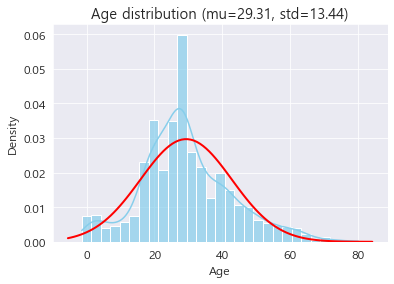

In [587]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 히스토그램과 정규분포 곡선 그리기
sns.histplot(all_data['Age'], kde=True, stat='density', color='skyblue', alpha=0.7)
mu, std = norm.fit(all_data['Age'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f'Age distribution (mu={mu:.2f}, std={std:.2f})')
plt.show()

## 모델링_with 피처엔지니어링

- 명목형 피처는 OneHotEncoding ==> Name , Sex , Embarked

- Pclass 는 MinMaxScaler로

In [588]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # 원-핫 인코더 생성
nom_feature = [ 'Pclass','Sex' , 'Embarked', 'Cabin']
encoded_nom_matrix = onehot_encoder.fit_transform(all_data2[nom_feature])
print(type(encoded_nom_matrix))
encoded_nom_matrix

<class 'scipy.sparse.csr.csr_matrix'>


<1309x15 sparse matrix of type '<class 'numpy.float64'>'
	with 5236 stored elements in Compressed Sparse Row format>

In [589]:
from sklearn.preprocessing import OneHotEncoder

# 범주형 변수의 원래 이름을 추출합니다.
nom_feature = ['Pclass' ,'Sex' , 'Embarked' , 'Cabin']
nom_feature_names = []
for feature in nom_feature:
    categories = onehot_encoder.categories_[nom_feature.index(feature)]
    for category in categories:
        nom_feature_names.append(f"{feature}_{category}")

# 범주형 변수를 OneHotEncoder로 변환합니다.
# encoded_nom_matrix = onehot_encoder.transform(all_data2[nom_feature])
#
# # 변환된 CSR 행렬의 피처명을 추출합니다.
# encoded_nom_names = onehot_encoder.get_feature_names(nom_feature_names)

# 결과를 출력합니다.
print(nom_feature_names)


['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Cabin_0', 'Cabin_1', 'Cabin_2', 'Cabin_3', 'Cabin_4', 'Cabin_5', 'Cabin_6']


In [590]:
print(type(encoded_nom_matrix))

<class 'scipy.sparse.csr.csr_matrix'>


In [591]:
all_data2 = all_data2.drop(nom_feature , axis =1)

In [592]:
all_data2['log_Fare'] = np.log(all_data['Fare'])
all_data2

,Name,Age,SibSp,Parch,Fare,log_Fare
PassengerId,,,,,,
1,3,22.000000,1,0,7.2500,1.981001
2,4,38.000000,1,0,71.2833,4.266662
3,2,26.000000,0,0,7.9250,2.070022
4,4,35.000000,1,0,53.1000,3.972177
5,3,35.000000,0,0,8.0500,2.085672
...,...,...,...,...,...,...
1305,3,28.544798,0,0,8.0500,2.085672
1306,6,39.000000,0,0,108.9000,4.690430
1307,3,38.500000,0,0,7.2500,1.981001


In [593]:
from sklearn.preprocessing import  MinMaxScaler

ord_features = [ 'log_Fare']
all_data2[ord_features] = MinMaxScaler().fit_transform(all_data2[ord_features])

# 인코딩 및 스케일링 된 피처 합치기

In [594]:
all_data2

,Name,Age,SibSp,Parch,Fare,log_Fare
PassengerId,,,,,,
1,3,22.000000,1,0,7.2500,0.162639
2,4,38.000000,1,0,71.2833,0.612131
3,2,26.000000,0,0,7.9250,0.180146
4,4,35.000000,1,0,53.1000,0.554219
5,3,35.000000,0,0,8.0500,0.183223
...,...,...,...,...,...,...
1305,3,28.544798,0,0,8.0500,0.183223
1306,6,39.000000,0,0,108.9000,0.695469
1307,3,38.500000,0,0,7.2500,0.162639


In [595]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

encoded_stan = standard_scaler.fit_transform(all_data2[['Name','Age' ]])

encoded_stan

array([[ 0.125, -0.544],
       [ 1.297,  0.646],
       [-1.048, -0.247],
       ...,
       [ 0.125,  0.684],
       [ 0.125, -0.057],
       [-2.22 , -1.265]])

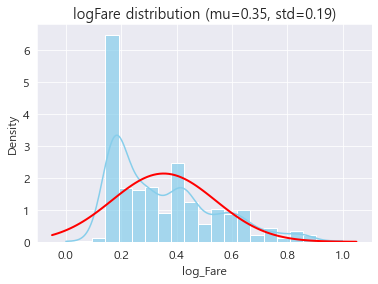

In [596]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 히스토그램과 정규분포 곡선 그리기
sns.histplot(all_data2['log_Fare'], kde=True, stat='density', color='skyblue', alpha=0.7)
mu, std = norm.fit(all_data2['log_Fare'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f'logFare distribution (mu={mu:.2f}, std={std:.2f})')
plt.show()

In [597]:
all_data2 = all_data2[[ 'SibSp' , 'Parch' , 'log_Fare']]
all_data2

,SibSp,Parch,log_Fare
PassengerId,,,
1,1,0,0.162639
2,1,0,0.612131
3,0,0,0.180146
4,1,0,0.554219
5,0,0,0.183223
...,...,...,...
1305,0,0,0.183223
1306,0,0,0.695469
1307,0,0,0.162639


In [598]:
encoded_nom_matrix

<1309x15 sparse matrix of type '<class 'numpy.float64'>'
	with 5236 stored elements in Compressed Sparse Row format>

In [599]:
encoded_stan

array([[ 0.125, -0.544],
       [ 1.297,  0.646],
       [-1.048, -0.247],
       ...,
       [ 0.125,  0.684],
       [ 0.125, -0.057],
       [-2.22 , -1.265]])

In [600]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data2),
                               encoded_nom_matrix,
                               sparse.csr_matrix(encoded_stan)],
                              format='csr')

all_data_sprs

<1309x20 sparse matrix of type '<class 'numpy.float64'>'
	with 9887 stored elements in Compressed Sparse Row format>

In [601]:
CSR_NAMES = all_data2.columns.tolist() + nom_feature_names + ['Name','Age' ]
CSR_NAMES

['SibSp',
 'Parch',
 'log_Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_0',
 'Sex_1',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2',
 'Cabin_0',
 'Cabin_1',
 'Cabin_2',
 'Cabin_3',
 'Cabin_4',
 'Cabin_5',
 'Cabin_6',
 'Name',
 'Age']

In [602]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train = all_data_sprs[:num_train] # 0~num_train -1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['Survived']

In [603]:
print(X_train.toarray())

[[ 1.     0.     0.163 ...  1.     0.125 -0.544]
 [ 1.     0.     0.612 ...  0.     1.297  0.646]
 [ 0.     0.     0.18  ...  1.    -1.048 -0.247]
 ...
 [ 1.     2.     0.393 ...  1.    -1.048 -0.993]
 [ 0.     0.     0.442 ...  0.     0.125 -0.247]
 [ 0.     0.     0.176 ...  1.     0.125  0.2  ]]


In [604]:
X_train

<891x20 sparse matrix of type '<class 'numpy.float64'>'
	with 6733 stored elements in Compressed Sparse Row format>

In [605]:
from sklearn.model_selection import train_test_split

# 훈련 데이터 , 검증 데이터 분리

# X_train , X_valid , y_train , y_valid = train_test_split(X_train , y , test_size=0.1 , stratify=y,random_state=10)

# test_size 는 검증 데이터 크기를 지정하는 파라미터이다.
# 값이 정수면 검증 데이터의 개수를 , 실수면 비율을 의미한다. 여기서는 0.1을 전달했으므로 10%를 검증 데이터로 분리하겠다는 의미이다.

# stratify 파라미터를 지정하지 않으면 훈련 데이터와 검증 데이터에 타깃값이 불균형하게 분포 될 수 있다.

In [606]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score # 교차 검증 패키지
from sklearn.metrics import mean_squared_error

clf = DecisionTreeClassifier()
clf.fit(X_train, y) # 모델 훈련
prediction = clf.predict(X_train) # 예측
tree_mse = mean_squared_error(y, prediction) # 오차 계산
tree_rmse = np.sqrt(tree_mse)
print("훈련 데이터 점수 :", tree_rmse)

# 교차 검증
scores = cross_val_score(clf, X_train, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# 점수 표시 함수 작성
def display_scores(scores):
    print("교차검증 점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(tree_rmse_scores)

훈련 데이터 점수 : 0.1111111111111111
교차검증 점수: [0.516 0.437 0.53  0.382 0.437 0.411 0.474 0.519 0.397 0.45 ]
평균: 0.4552886601585535
표준편차: 0.05024907972715675


# 모델 모델 파라미터 조작 : 규제

## 결정트리에 대해 규제를 가하는 대표적인 방법은 가지치기이다. 즉 트리의 깊이를 조절하는 방법이다. 사이킷런에서는 max_depth 매개변수로 이를 조절할 수 있다. 트리의 깊이에 상한을 정하여 과도하게 복잡한 트리가 만들어지는 것을 방지한다. 결정트리 모델에 아무런 매개변수도 입력하지 않았을 경우(기본 매개변수) 규제가 없는 모델이 생성된다.

In [607]:
score_list = []
kfold_score_list = []
for i in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train.toarray(), y)  # X_train을 밀집 배열로 변환
    prediction = clf.predict(X_train.toarray())
    tree_mse = mean_squared_error(y, prediction)  # mean_squared_error 인자 순서 수정
    tree_rmse = np.sqrt(tree_mse)
    scores = cross_val_score(clf, X_train.toarray(), y,  # X_train을 밀집 배열로 변환
                             scoring="neg_mean_squared_error", cv=10)
    tree_rmse_scores = np.sqrt(-scores)
    score_list.append(tree_rmse)
    kfold_score_list.append(tree_rmse_scores.mean())


In [608]:
score_data = {'훈련 세트 점수' : score_list, '교차 검증 점수' : kfold_score_list}
score_data_frame = pd.DataFrame(score_data, index=range(1,11))
score_data_frame # 교차 검증 점수가 7일때 가장 낮다.

,훈련 세트 점수,교차 검증 점수
1,0.461783,0.460737
2,0.461783,0.477363
3,0.425083,0.444763
4,0.400617,0.444586
5,0.374555,0.446204
6,0.343286,0.444071
7,0.321333,0.431814
8,0.303367,0.429290
9,0.280292,0.434395
10,0.250700,0.439186


## min_samples_leaf

### 리프노드는 더이상 자식 노드를 갖지 않는 불순도 0의 노드이다. 사이킷런의 min_samples_leaf 파라미터는 리프노드가 가져야할 최소 샘플 수를 의미한다. 결정트리에서 min_ 으로 시작하는 매개변수를 증가시키거나 max_로 시작하는 매개변수를 감소시킬수록 모델의 규제는 더 커진다.

In [615]:
score_list=[]
kfold_score_list=[]
for i in range(1,11):
    clf = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = i)
    clf.fit(X_train, y)
    prediction = clf.predict(X_train)
    tree_mse = mean_squared_error(y, prediction)
    tree_rmse = np.sqrt(tree_mse)
    scores = cross_val_score(clf, X_train, y,
                             scoring="neg_mean_squared_error", cv=10)
    tree_rmse_scores = np.sqrt(-scores)
    score_list.append(tree_rmse)
    kfold_score_list.append(tree_rmse_scores.mean())

In [616]:
score_data = {'훈련 세트 점수' : score_list, '교차 검증 점수' : kfold_score_list}
score_data_frame = pd.DataFrame(score_data, index=range(1,11))
score_data_frame # min_leaf_score = 5일때 가장 낮다.

,훈련 세트 점수,교차 검증 점수
1,0.303367,0.435708
2,0.333333,0.443594
3,0.338346,0.432172
4,0.346540,0.436481
5,0.349763,0.419301
6,0.351364,0.425023
7,0.356123,0.420648
8,0.362372,0.438176
9,0.370034,0.449981
10,0.371547,0.442769


In [611]:
X_test

<418x20 sparse matrix of type '<class 'numpy.float64'>'
	with 3154 stored elements in Compressed Sparse Row format>

In [617]:
# 모델 훈련
clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5) #
clf.fit(X_train , y)
# test_data = test.drop("PassengerId", axis=1)
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## 하이퍼파라미터 최적화

In [618]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ",date_list)



현재 날짜 및 시각 :  [5, 14, 16, 55]


In [619]:

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')